In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [251]:
data = pd.read_excel('/Users/ahmetokur/Desktop/Datasets/CEP1_dataset.xlsx')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


 
### 1.	Preliminary analysis:

 #### a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values,             duplicates, etc.



In [252]:
data.shape

(303, 14)

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [254]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 #### b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [255]:
data.duplicated().sum()

1

In [256]:
data[data.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [257]:
data.drop_duplicates(inplace=True)

In [258]:
data.reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [259]:
data[data.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [260]:
data.shape

(302, 14)

### 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

#### a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [261]:
print("Mean Values in the Distribution")
print(data.mean())
print("*******************************")
print("Median Values in the Distribution")
print( data.median())

Mean Values in the Distribution
age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64
*******************************
Median Values in the Distribution
age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64


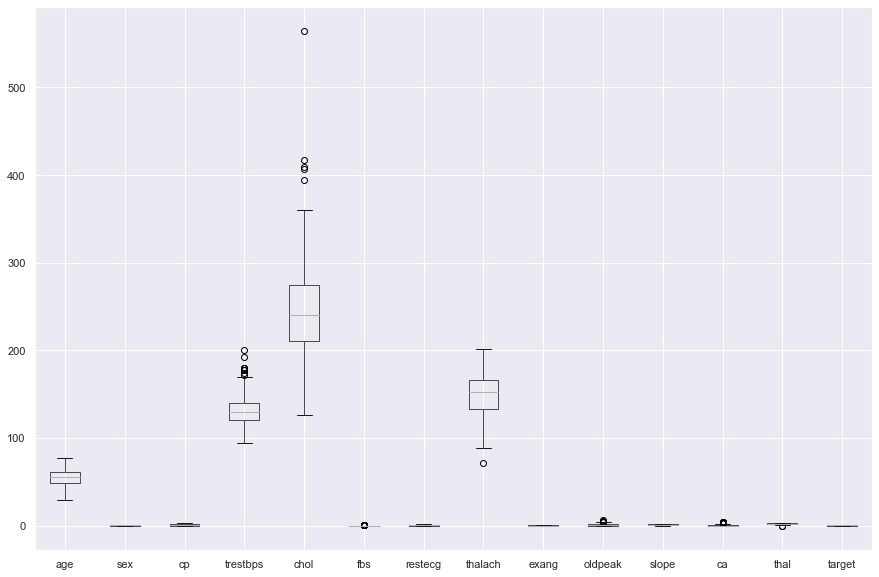

In [262]:
boxplot = data.boxplot(column=list(data.columns), figsize = (15,10))


#### b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [263]:
import seaborn as sns
df_catagoricals = data[["sex", "cp", "exang", "thal", "target"]]
df_catagoricals.head(10)
# ax = sns.countplot(x = "sex", data=df_catagoricals["sex"], hue="target")

,sex,cp,exang,thal,target
0,1,3,0,1,1
1,1,2,0,2,1
2,0,1,0,2,1
3,1,1,0,2,1
4,0,0,1,2,1
5,1,0,0,1,1
6,0,1,0,2,1
7,1,1,0,3,1
8,1,2,0,3,1
9,1,2,0,2,1


<AxesSubplot:xlabel='sex', ylabel='count'>

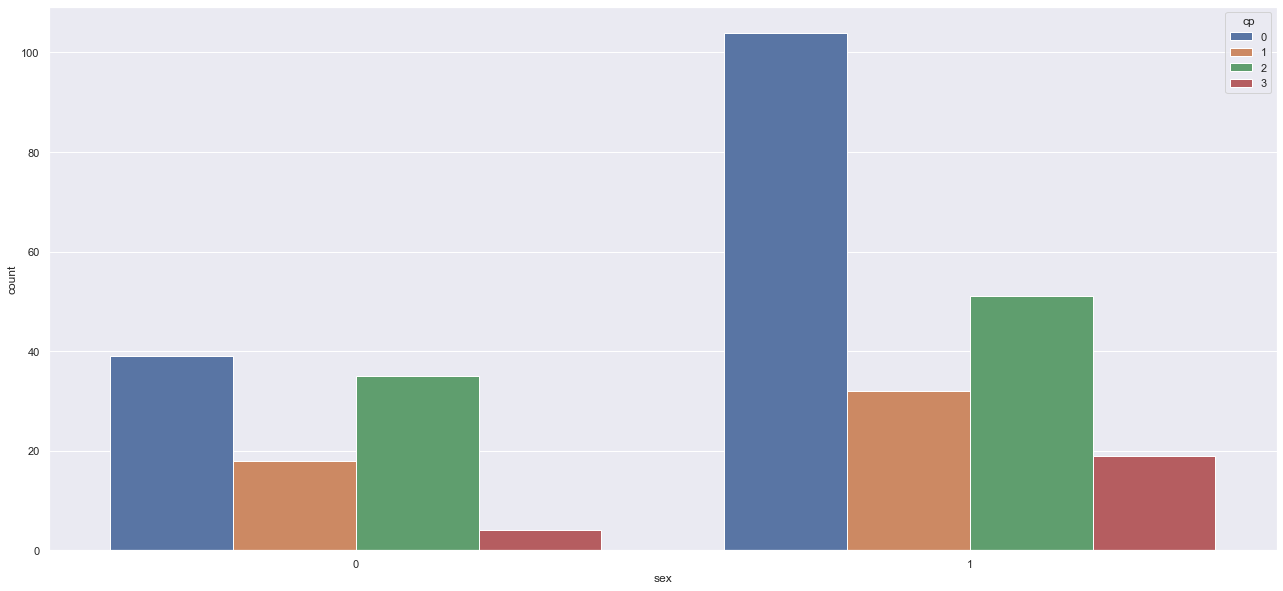

In [264]:
sns.countplot(x ='sex', hue="cp", data = df_catagoricals)

### c.	Study the occurrence of CVD across the Age category

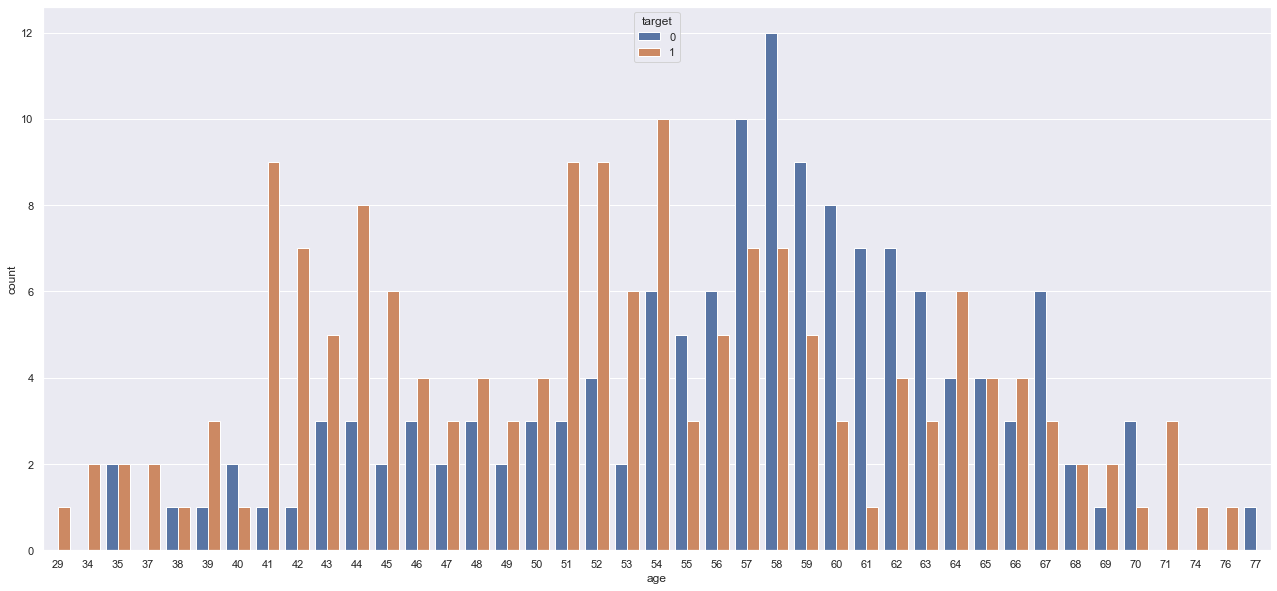

In [225]:
sns.countplot(x ='age', hue="target", data = data)
sns.set(rc = {'figure.figsize':(22,10)})

#### d.	Study the composition of all patients with respect to the Sex category

<AxesSubplot:xlabel='sex', ylabel='count'>

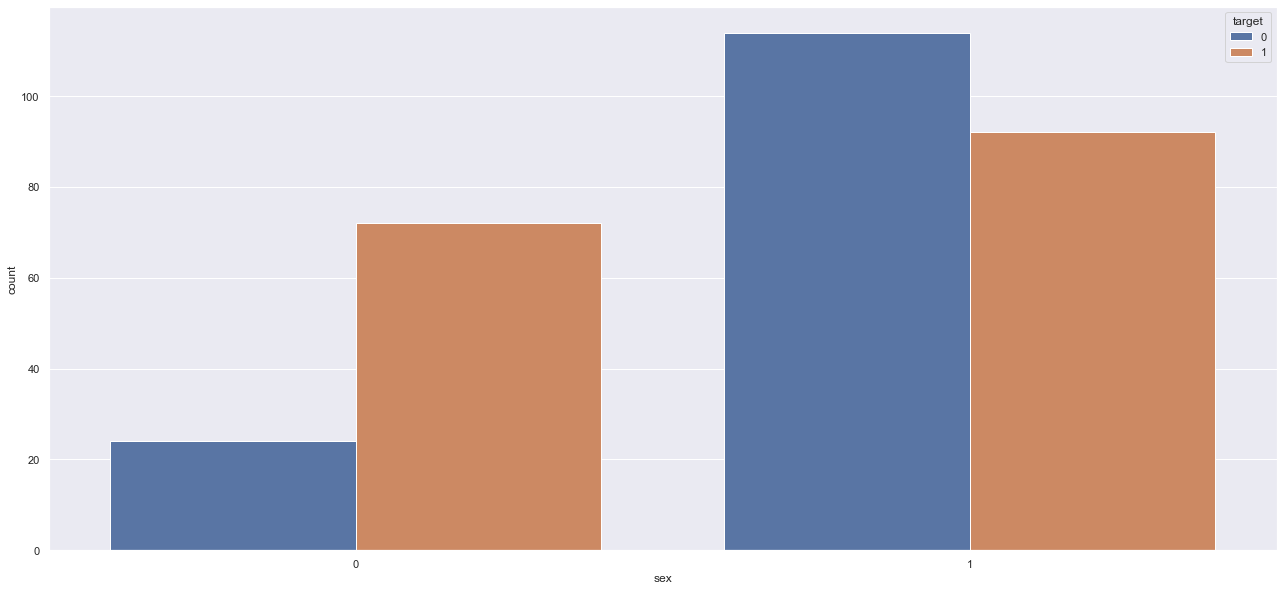

In [226]:
sns.countplot(x ='sex', hue="target", data = data)

#### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

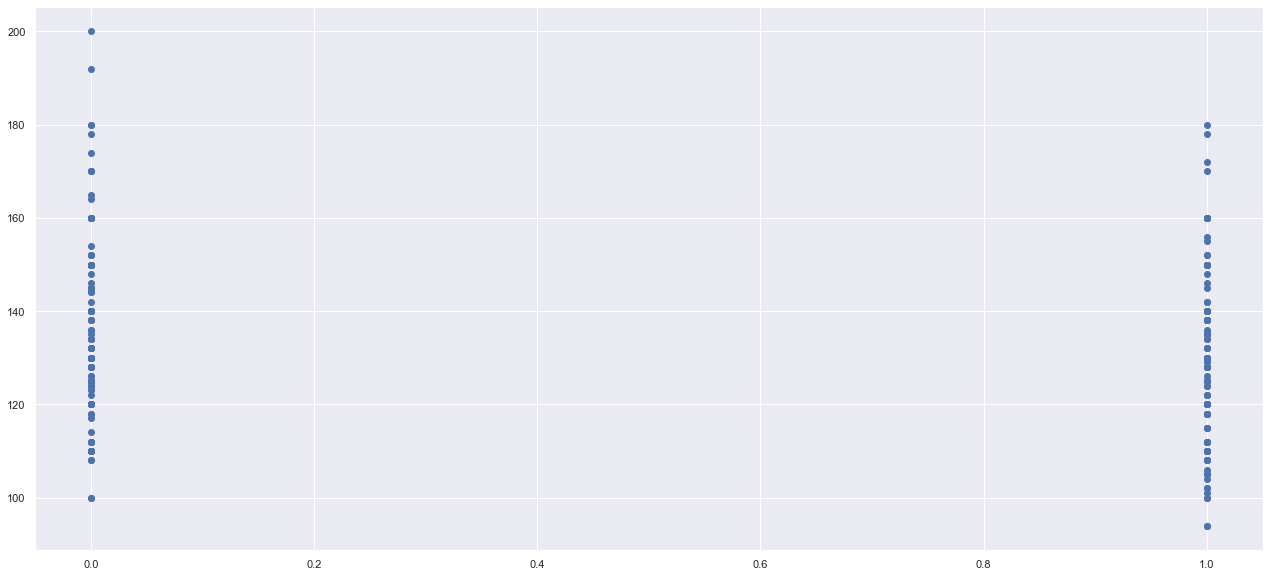

In [78]:
plt.scatter(x=data["target"], y=data["trestbps"])

#### When we interpret the scatter plot, there are no big differences between resting blood pressure(trestbps) of patients having cardiovascular disease(target=1) and patients not having cardiovascular disease(target=0). After that insight we can assume that we can not detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient



### f.	Describe the relationship between cholesterol levels and a target variable

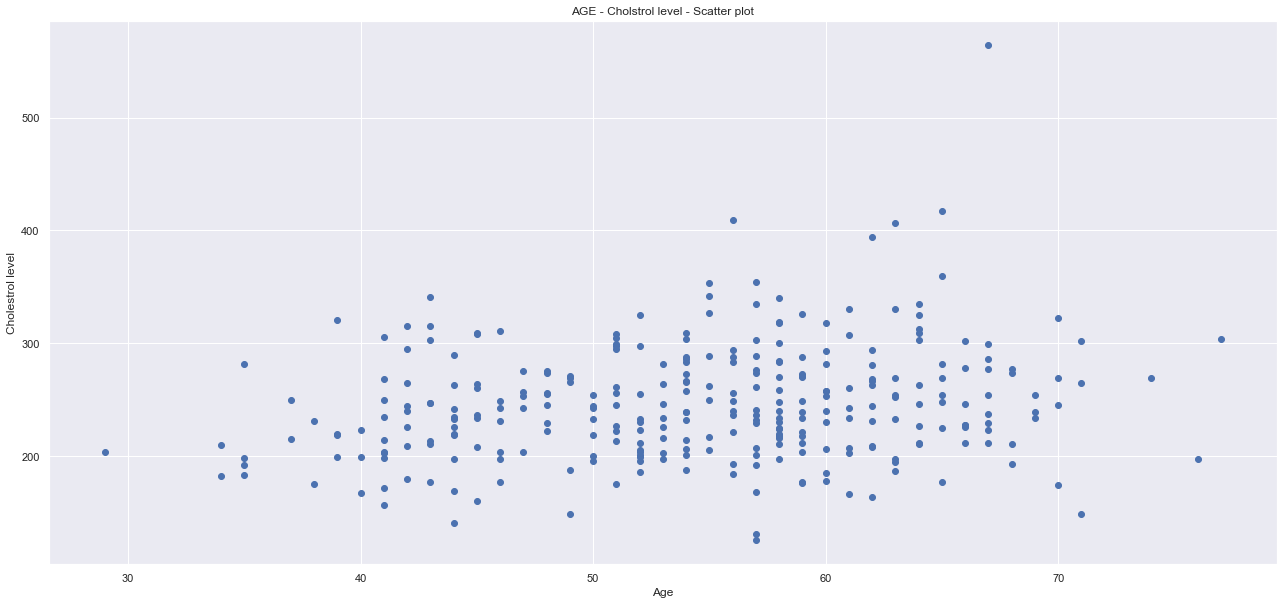

In [79]:
plt.scatter(x=data["age"], y=data["chol"])
plt.title("AGE - Cholstrol level - Scatter plot")
plt.xlabel("Age")
plt.ylabel("Cholestrol level")
plt.show()

#### We can observe a slight increase in the cholestrol level with the increase in the age.

### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

<AxesSubplot:xlabel='target', ylabel='count'>

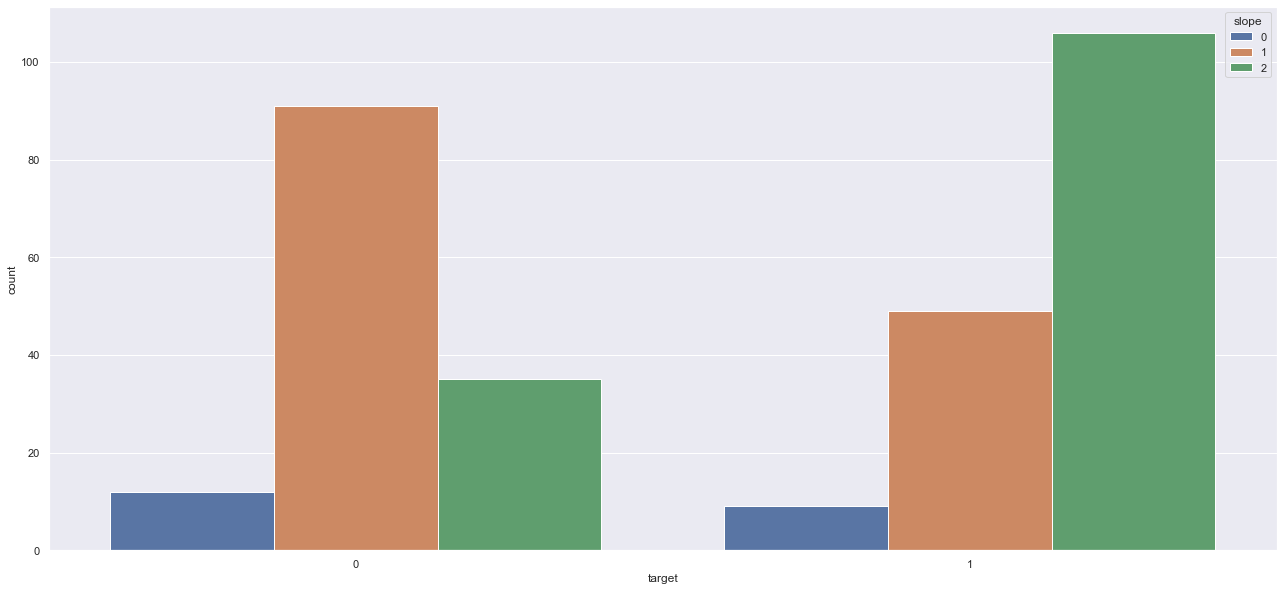

In [80]:
sns.countplot(x ='target', hue="slope", data = data)

#### If the slope of the peak exercise ST segment is upwards(slope = 2), we can say that it is more likely for patient to have heart attack. In addition, when we look at the count plot above we can observe if the patient not having heart attack(target=0), the slope is average(slope=1)



### h.	Check if thalassemia is a major cause of CVD

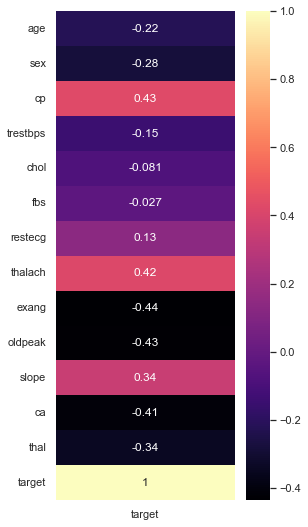

In [81]:
plt.figure(figsize = (4,9))
sns.heatmap(data.corr()[["target"]], annot = True, cmap = 'magma')
plt.show()

#### When we look at the heatmap CVD and thalassemia is negatively correlated(-0.34). Which means thalassemia is not one of the main causes of CVD.


### i.	List how the other factors determine the occurrence of CVD

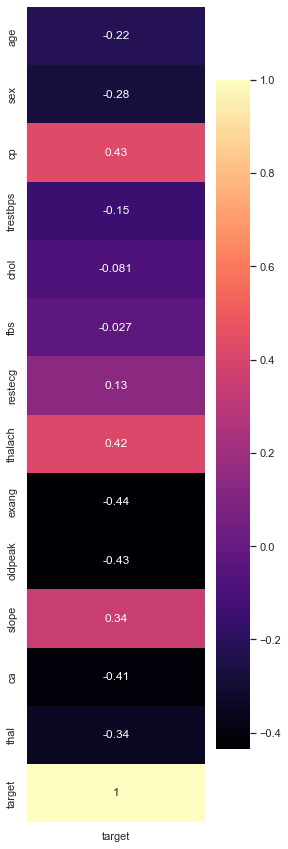

In [82]:
plt.figure(figsize = (4,15))
sns.heatmap(data.corr()[["target"]], annot = True, cmap = 'magma')
plt.show()

#### When we examine the heatmap and correlation of all features respect to target variable, we can see that slope, thalach and cp are positively correlated to target, while thal, ca, oldpeak and exang are negatively correlated with target. From that insight we can say that factors mostly reponsible of occurance of CVD are the ones which have positive correlation with the target(slope, thalach and cp).



### j.	Use a pair plot to understand the relationship between all the given variables

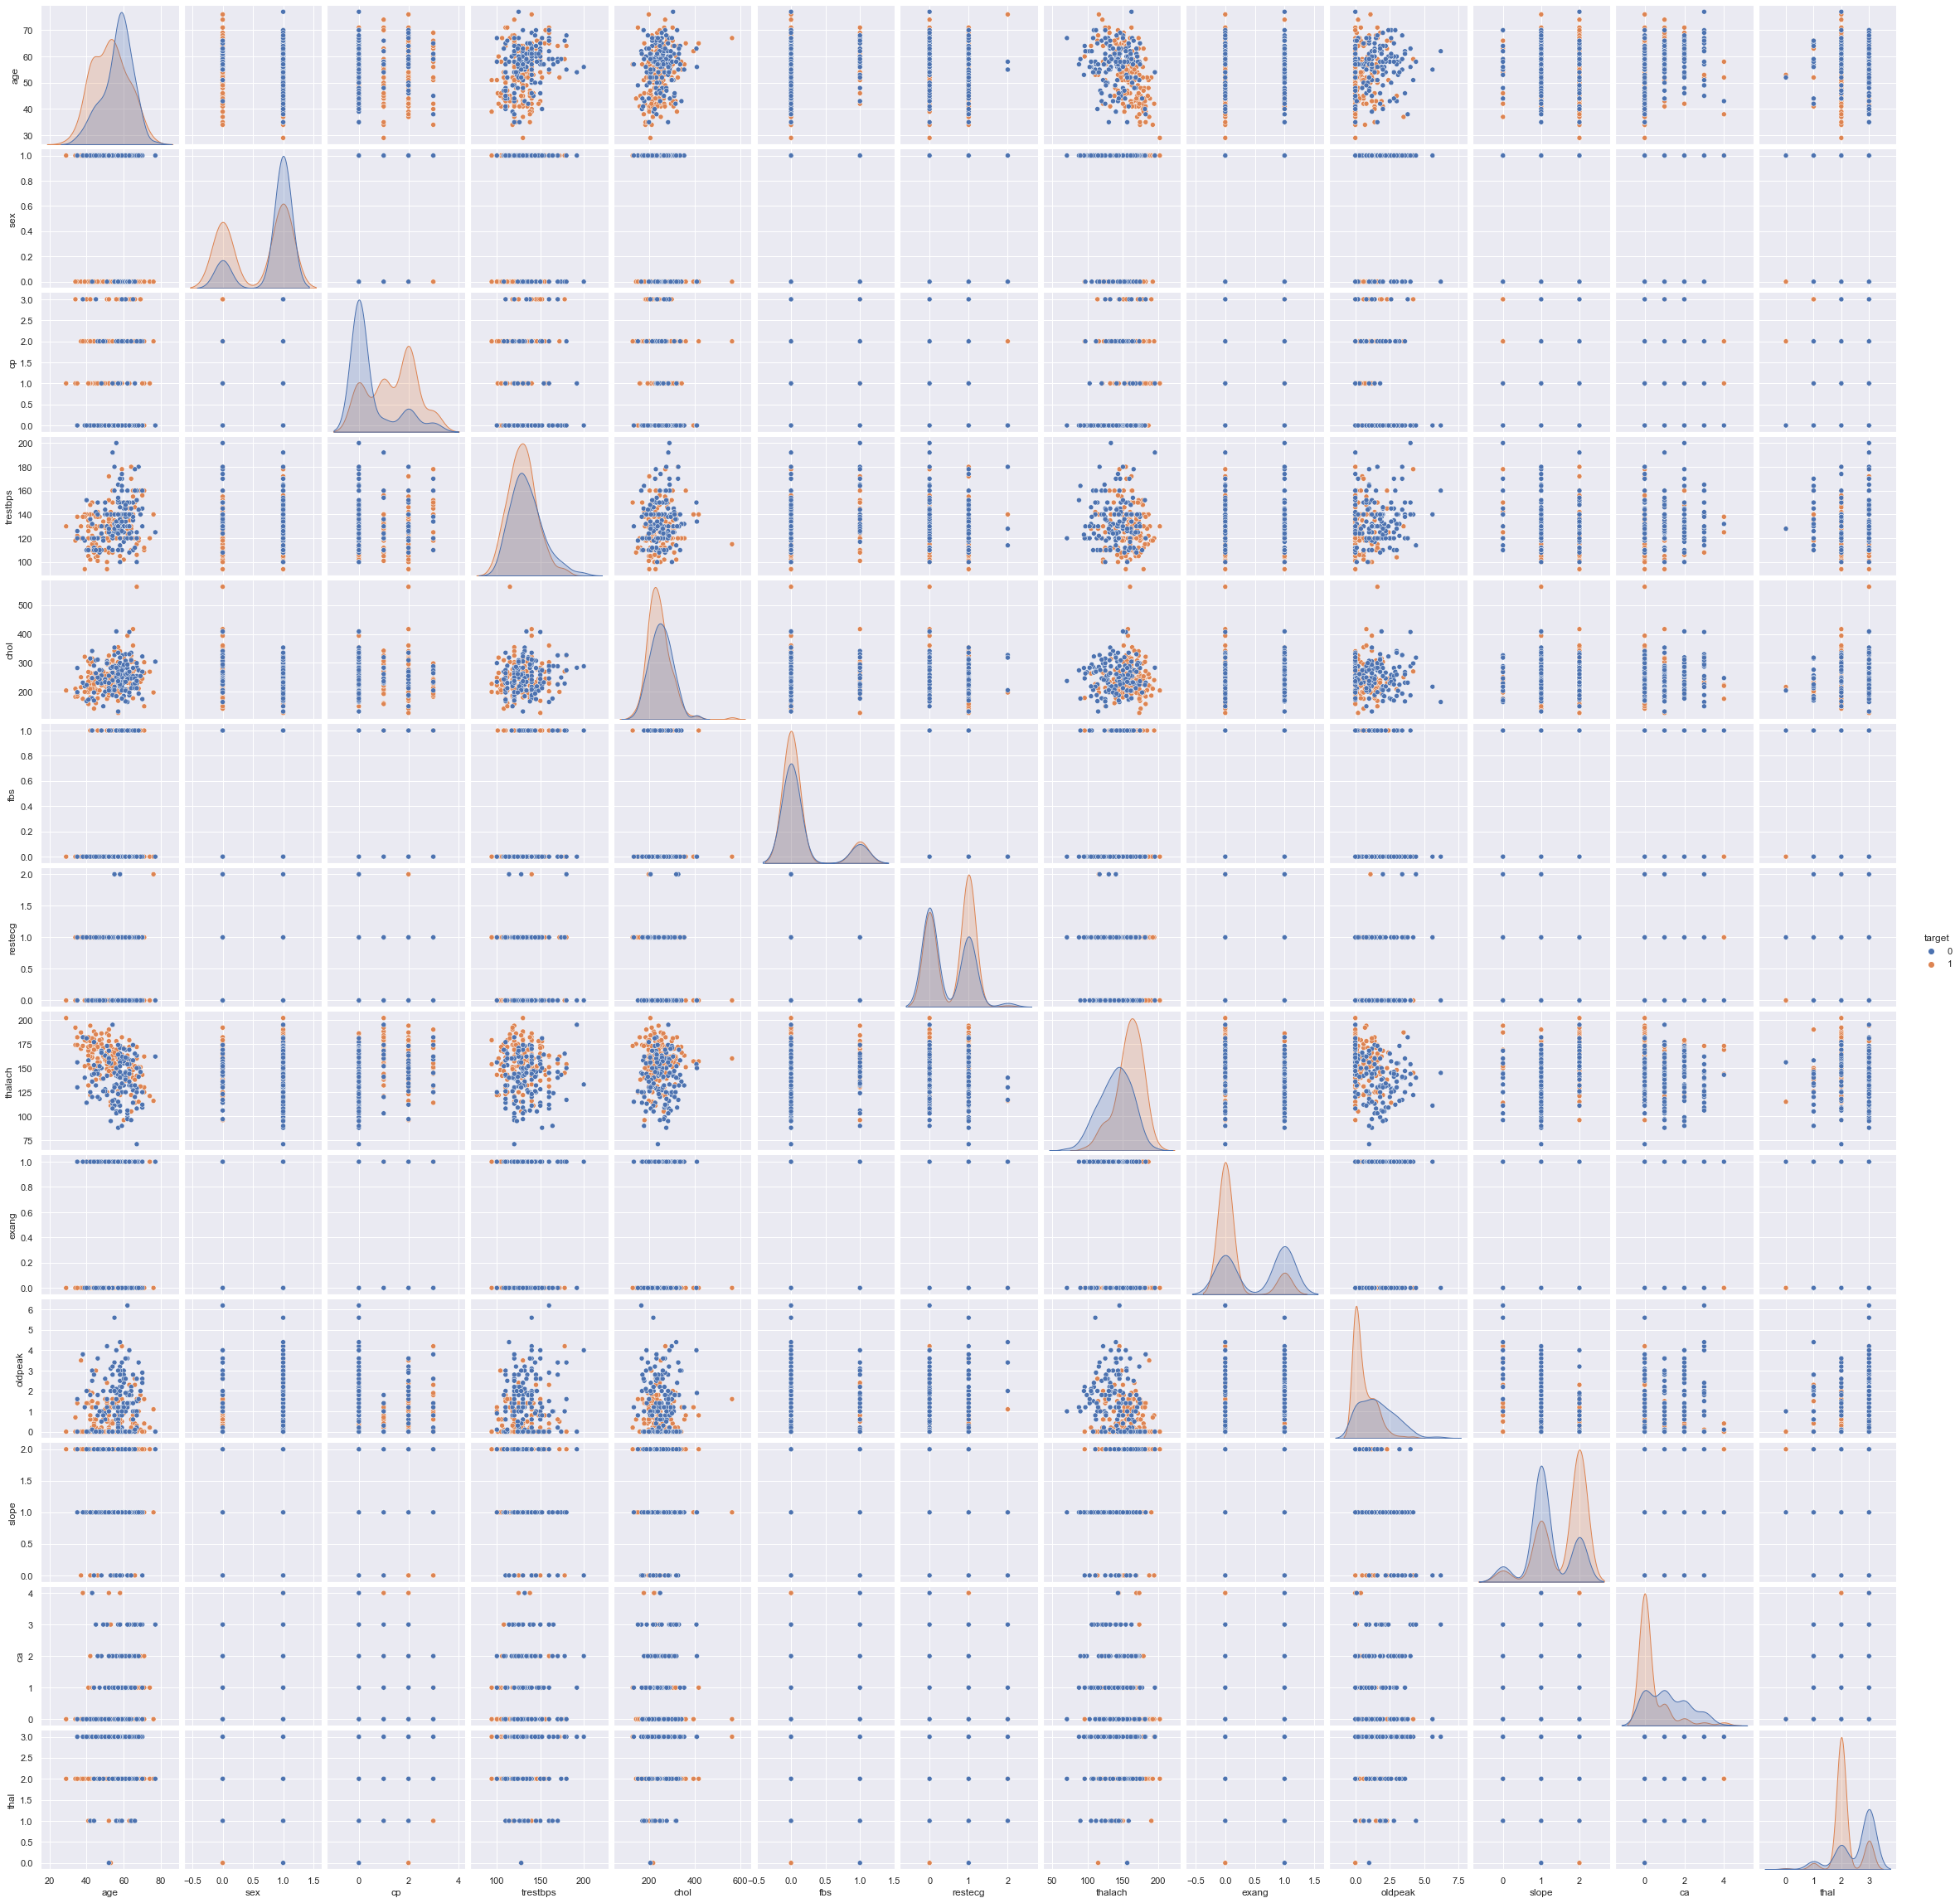

In [24]:
sns.pairplot(data, hue="target")

In [300]:
# Using feature scaling to increase the model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [301]:
data.iloc[:,0:1] = scaler.fit_transform(data.iloc[:,0:1].to_numpy())

## 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [280]:
# Calculating Standard Error of Mean(SEM) for all the features for Features Selection.
from scipy import stats
stats.sem(data)

array([0.05763904, 0.02683979, 0.05938744, 1.01065977, 2.97807862,
       0.02052497, 0.03026946, 1.31794989, 0.02705674, 0.06683407,
       0.03546258, 0.05793185, 0.03527566, 0.02871252])

In [281]:
from sklearn import linear_model

In [282]:
# We are not including 'chol', 'thalach' and 'trestbps' because of the SEM is grater than 1 for these features.
# In addition, when we observe the both cases that we include these 3 features and not, the model accuracy, precison and f1 score is higher.
features = ['age', 'sex', 'cp','fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [283]:
X = data[features]
Y = data.target

In [284]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [285]:
from sklearn.linear_model import LogisticRegression

In [286]:
lr = LogisticRegression()

In [287]:
lr.fit(x_train, y_train)

LogisticRegression()

In [288]:
lr.score(x_test, y_test)

0.8289473684210527

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [290]:
rf = RandomForestClassifier(n_estimators=200)

In [291]:
rf_best = rf.fit(x_train, y_train)

#### Evaluating the Model

In [292]:
pred = rf_best.predict(x_test)
from sklearn.metrics import confusion_matrix

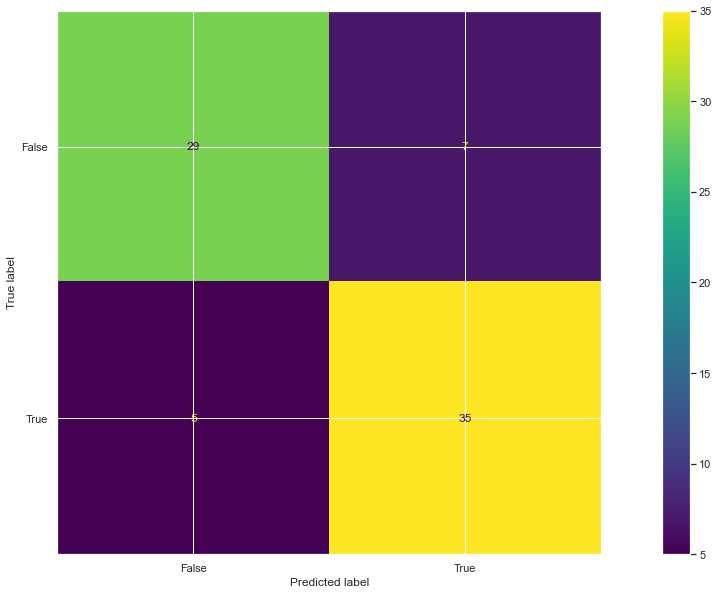

In [293]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

confusion_matrix.plot()
plt.show()

In [294]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [295]:
#ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)


0.8421052631578947

In [296]:
#precision
from sklearn.metrics import precision_score
precision_score(pred, y_test)


0.875

In [297]:
# Recall
from sklearn.metrics import recall_score
recall_score(pred, y_test)


0.8333333333333334

In [298]:
#f1 score
from sklearn.metrics import f1_score
f1_score(pred, y_test)

0.8536585365853658

In [299]:
pd.crosstab(y_test, pred, rownames=['True'], colnames=['prediction'], margins=True)

prediction,0,1,All
True,,,
0,29,7,36
1,5,35,40
All,34,42,76
